# Regresion lineal EVI en Lago San Roque _ VillaCarlosPaz

Se genero un dataset a partir de observaciones satelitales que contemplan un periodo de 2019 en adelante.
La idea es utilizar estos datos para generar un modelo que pueda estimar la prolisferacion de cianobacterias en el lago San Roque.




In [51]:
#Librerias
import matplotlib.pylab as plt 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

In [52]:
# Traemos los datos

file2019 = 'C:\\Users\\Bruno\\Desktop\\Data Science\\EjerciciosPandas\\NVDI_Lago_SanRoque\\DataSet_EVI_LagoSanRoque_2019.csv' 
file2020 = 'C:\\Users\\Bruno\\Desktop\\Data Science\\EjerciciosPandas\\NVDI_Lago_SanRoque\\DataSet_EVI_LagoSanRoque_2020.csv' 
file2021 = 'C:\\Users\\Bruno\\Desktop\\Data Science\\EjerciciosPandas\\NVDI_Lago_SanRoque\\DataSet_EVI_LagoSanRoque_2021.csv' 

d_2019 = pd.read_csv(file2019, decimal= ",")
d_2020 = pd.read_csv(file2020, decimal= ",")
d_2021 = pd.read_csv(file2021, decimal= ",")

df_2019= pd.DataFrame(d_2019)
df_2020= pd.DataFrame(d_2020)
df_2021= pd.DataFrame(d_2021)


In [53]:
d_filtrado_2019 = d_2019[['Index',
                'EVI'
                ]].dropna().copy() # Nos quedamos con ciertos campos del data set, para facilitar el trabajo. Y para limitarlo.
                                                  # Notar que primero aplicamos el método .dropna() para eliminar filas que tengan alguna columna con NaN
                                                  # Ademas, el metodo copy() nos asegura que estemos creando un nuevo dataframe

d_filtrado_2020 = d_2020[['Index',
                'EVI'
                ]].dropna().copy() # Nos quedamos con ciertos campos del data set, para facilitar el trabajo. Y para limitarlo.
                                                  # Notar que primero aplicamos el método .dropna() para eliminar filas que tengan alguna columna con NaN
                                                  # Ademas, el metodo copy() nos asegura que estemos creando un nuevo dataframe

d_filtrado_2021 = d_2021[['Index',
                'EVI'
                ]].dropna().copy() # Nos quedamos con ciertos campos del data set, para facilitar el trabajo. Y para limitarlo.
                                                  # Notar que primero aplicamos el método .dropna() para eliminar filas que tengan alguna columna con NaN
                                                  # Ademas, el metodo copy() nos asegura que estemos creando un nuevo dataframe

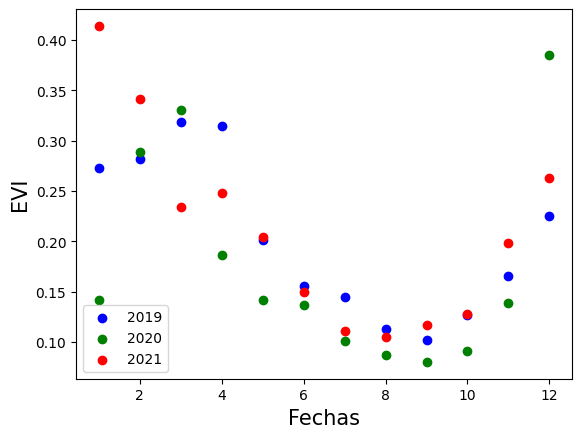

In [54]:
x_2019 = np.array(d_filtrado_2019['Index'])
ciano_2019 = np.array(d_filtrado_2019['EVI'])

x_2020 = np.array(d_filtrado_2020['Index'])
ciano_2020 = np.array(d_filtrado_2020['EVI'])

x_2021 = np.array(d_filtrado_2021['Index'])
ciano_2021 = np.array(d_filtrado_2021['EVI'])

X_2019 = x_2019.reshape(-1, 1) # esto es necesario para transformar el vector en matriz y usarlo en el eje
y_2019= ciano_2019

X_2020 = x_2020.reshape(-1, 1) # esto es necesario para transformar el vector en matriz y usarlo en el eje
y_2020= ciano_2020

X_2021 = x_2021.reshape(-1, 1) # esto es necesario para transformar el vector en matriz y usarlo en el eje
y_2021= ciano_2021

plt.scatter(X_2019,y_2019,c="blue")
plt.scatter(X_2020,y_2020,c="green")
plt.scatter(X_2021,y_2021,c="red")
plt.ylabel(r'EVI', fontsize=15, color='black')
plt.xlabel(r'Fechas', fontsize=15, color='black')
plt.legend(['2019', '2020', '2021'])


# Modelado


In [55]:
"""## Modelo estimado
# Creación del modelo lineal
reg = LinearRegression()

# Ajuste del modelo
reg.fit(X, y)

# Coeficientes del modelo
beta_0_estimado = reg.intercept_
beta_1_estimado = reg.coef_[0]

print('Ordenada al origen = {:.3f}'.format(beta_0_estimado))
print('Pendiente = {:.3f}'.format(beta_1_estimado))

# Calidad del ajuste
print('Calidad de ajuste R^2 = {:.3f}'.format(reg.score(X, y)))"""

"## Modelo estimado\n# Creación del modelo lineal\nreg = LinearRegression()\n\n# Ajuste del modelo\nreg.fit(X, y)\n\n# Coeficientes del modelo\nbeta_0_estimado = reg.intercept_\nbeta_1_estimado = reg.coef_[0]\n\nprint('Ordenada al origen = {:.3f}'.format(beta_0_estimado))\nprint('Pendiente = {:.3f}'.format(beta_1_estimado))\n\n# Calidad del ajuste\nprint('Calidad de ajuste R^2 = {:.3f}'.format(reg.score(X, y)))"

In [56]:
"""## Graficos

fig, ax = plt.subplots(1, 1, figsize = (6, 4))

# Puntos de entrenamiento
ax.scatter(X_2019, y_2019, color = 'b', alpha = 0.35, s = 100)

# Relacion estimada
y_estimado = np.polyval([beta_1_estimado, beta_0_estimado], X)
ax.plot(X_2019, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

ax.legend(['Real', 'Estimado'])
plt.show()"""

"## Graficos\n\nfig, ax = plt.subplots(1, 1, figsize = (6, 4))\n\n# Puntos de entrenamiento\nax.scatter(X_2019, y_2019, color = 'b', alpha = 0.35, s = 100)\n\n# Relacion estimada\ny_estimado = np.polyval([beta_1_estimado, beta_0_estimado], X)\nax.plot(X_2019, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)\n\nax.legend(['Real', 'Estimado'])\nplt.show()"

In [57]:
# Primero creamos términos polinómicos,"polyfeats".
# Ojo con include_bias: por default es True y genera una columna con todos 1 (= x^0)
# Si dejamos esto en True, es conveniente pedirle luego al modelo lineal que no ajuste la ordenada al origen para evitar confusiones
polyfeats_2019 = PolynomialFeatures(degree = 3, include_bias = True)
X_poly_2019 = polyfeats_2019.fit_transform(X_2019)

polyfeats_2020 = PolynomialFeatures(degree = 3, include_bias = True)
X_poly_2020 = polyfeats_2020.fit_transform(X_2020)

polyfeats_2021 = PolynomialFeatures(degree = 3, include_bias = True)
X_poly_2021 = polyfeats_2021.fit_transform(X_2021)

print(X_poly_2019)
print("\n")


[[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.100e+01 1.210e+02 1.331e+03]
 [1.000e+00 1.200e+01 1.440e+02 1.728e+03]]




In [58]:
## Creación y ajuste del modelo

# Creación del modelo lineal, idéntico al caso de una sola variable
# Al poner fit_intercept = False, todos los coeficientes del modelo están en el atributo ".coef_"
# Esto último es deseable si antes ponemos PolynomialFeatures(include_bias = True)

reg_2019 = LinearRegression(fit_intercept = False)
# Ajuste del modelo con los términos polinómicos 2019
reg_2019.fit(X_poly_2019, y_2019)

reg_2020 = LinearRegression(fit_intercept = False)
# Ajuste del modelo con los términos polinómicos 2020
reg_2020.fit(X_poly_2020, y_2020)

reg_2021 = LinearRegression(fit_intercept = False)
# Ajuste del modelo con los términos polinómicos 2021
reg_2021.fit(X_poly_2021, y_2021)

# Coeficientes del modelo, el orden corresponde a las columnas de X_poly
print('\nCoeficientes polinomio 2019 = {}'.format(reg_2019.coef_))
print('\nCoeficientes polinomio 2020 = {}'.format(reg_2020.coef_))
print('\nCoeficientes polinomio 2021 = {}'.format(reg_2021.coef_))


Coeficientes polinomio 2019 = [ 0.21776768  0.0796366  -0.02178544  0.00127493]

Coeficientes polinomio 2020 = [ 0.04828283  0.16749652 -0.03887968  0.00225783]

Coeficientes polinomio 2021 = [ 4.63797980e-01 -6.09192844e-02 -1.14474414e-03  4.01579902e-04]


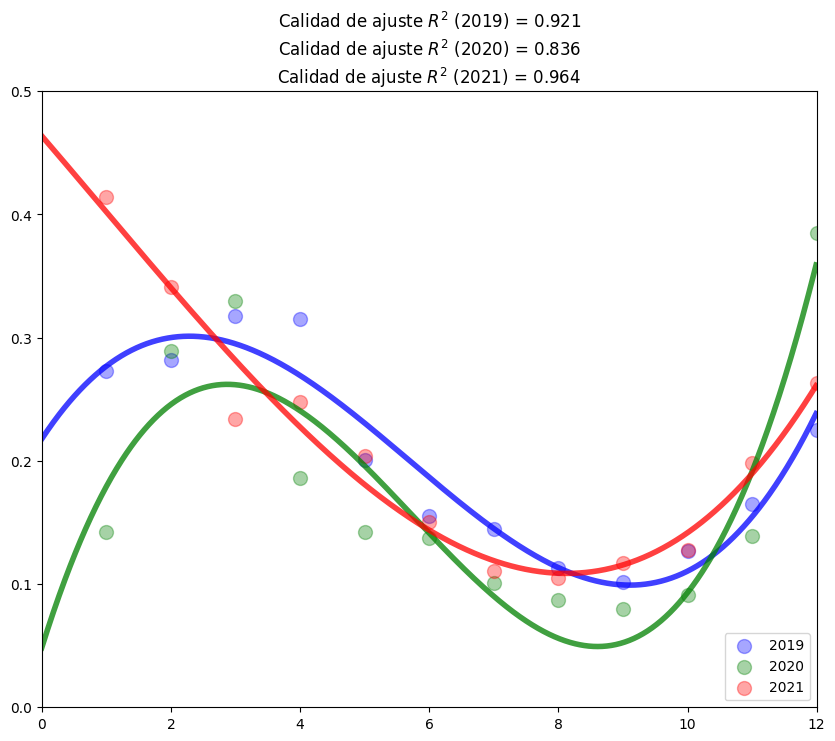

In [59]:
## Graficos

fig, ax = plt.subplots(1, 1, figsize = (10, 8))

# Puntos de entrenamiento
ax.scatter(X_2019, y_2019, color = 'b', alpha = 0.35, s = 100)
ax.scatter(X_2020, y_2020, color = 'g', alpha = 0.35, s = 100)
ax.scatter(X_2021, y_2021, color = 'r', alpha = 0.35, s = 100)
# Relacion estimada
x_aux = np.arange(0, 12, 0.01)

y_estimado_2019 = np.polyval(np.flip(reg_2019.coef_), x_aux)
ax.plot(x_aux, y_estimado_2019, color = 'b', linestyle = '-', linewidth = 4, alpha = 0.75)
# Calidad del ajuste 2019


y_estimado_2020 = np.polyval(np.flip(reg_2020.coef_), x_aux)
ax.plot(x_aux, y_estimado_2020, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)
# Calidad del ajuste 2020


y_estimado_2021 = np.polyval(np.flip(reg_2021.coef_), x_aux)
ax.plot(x_aux, y_estimado_2021, color = 'r', linestyle = '-', linewidth = 4, alpha = 0.75)
# Calidad del ajuste 2019

ax.set_title('Calidad de ajuste $R^2$ (2019) = {:.3f}'.format(reg_2019.score(X_poly_2019, y_2019)) + '\n'
    'Calidad de ajuste $R^2$ (2020) = {:.3f}'.format(reg_2020.score(X_poly_2020, y_2020))+ '\n'+
    'Calidad de ajuste $R^2$ (2021) = {:.3f}'.format(reg_2021.score(X_poly_2021, y_2021)))



ax.set_ylim([0, 0.5])
ax.set_xlim([0, 12])

ax.legend(['2019','2020','2021'], loc = 4)
plt.show()

In [60]:
print((y_2019[0] + y_2020[0] + y_2021[0] )/3)
 

0.2763333333333333


In [89]:
y_mean_aux = np.zeros((12),dtype=float)
print((y_2019[0] + y_2020[0] + y_2021[0] )/3)
print("\n")

for i in x_2019:
    if(i<=11):
        y_mean_aux [i] = ((y_2019[i] + y_2020[i] + y_2021[i] )/3)
        print(y_mean_aux [i])
    else:
        break
#y_mean = y_mean_aux[1:]
y_mean = y_mean_aux
y_mean[0]= (y_2019[0] + y_2020[0] + y_2021[0] )/3
X_mean = np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(-1, 1)
#np.delete(y_mean_aux , 0)
#np.pop(y_mean,0)

print("\n")
print(y_mean)
print("\n")

polyfeats_mean = PolynomialFeatures(degree = 3, include_bias = True)
X_poly_mean = polyfeats_mean.fit_transform(X_mean)

print(X_poly_mean)
print("\n")


reg_mean = LinearRegression(fit_intercept = False)
# Ajuste del modelo con los términos polinómicos 2021
reg_mean.fit(X_poly_mean, y_mean)

# Coeficientes del modelo, el orden corresponde a las columnas de X_poly
print('\nCoeficientes polinomio promedio = {}'.format(reg_mean.coef_))



0.2763333333333333


0.304
0.294
0.24966666666666668
0.18233333333333332
0.14733333333333334
0.119
0.10166666666666667
0.09966666666666667
0.11533333333333333
0.16733333333333333
0.291


[0.27633333 0.304      0.294      0.24966667 0.18233333 0.14733333
 0.119      0.10166667 0.09966667 0.11533333 0.16733333 0.291     ]


[[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.100e+01 1.210e+02 1.331e+03]
 [1.000e+00 1.200e+01 1.440e+02 1.728e+03]]



Coeficientes polinomio promedio = [ 0.24328283  0.06207128 -0.02060329  0.00131145]


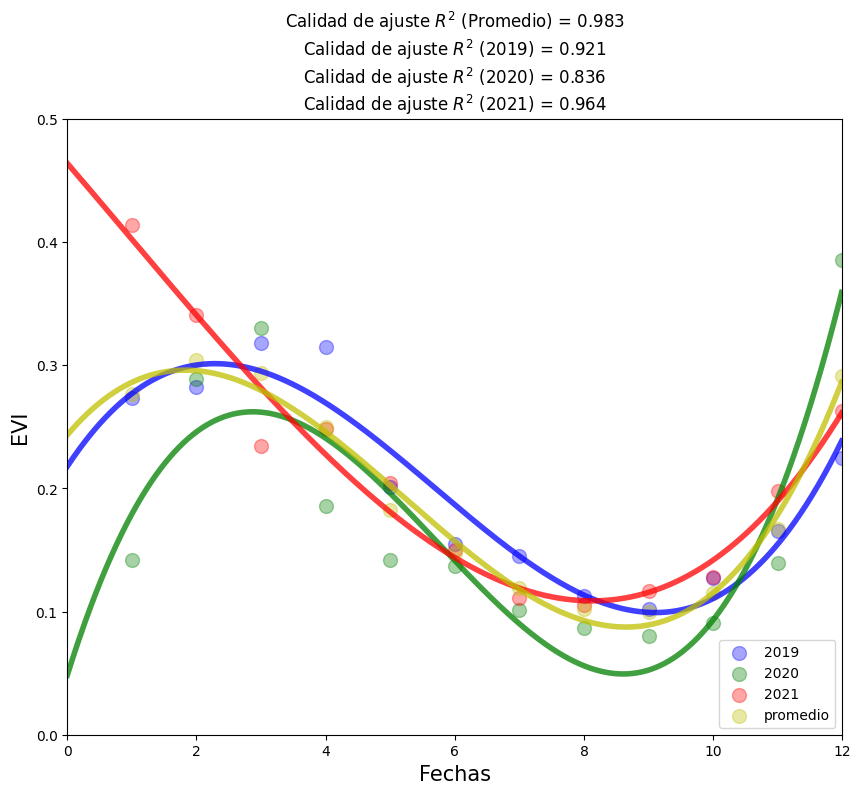

In [86]:
## Graficos

fig, ax = plt.subplots(1, 1, figsize = (10, 8))

# Puntos de entrenamiento
ax.scatter(X_2019, y_2019, color = 'b', alpha = 0.35, s = 100)
ax.scatter(X_2020, y_2020, color = 'g', alpha = 0.35, s = 100)
ax.scatter(X_2021, y_2021, color = 'r', alpha = 0.35, s = 100)
ax.scatter(X_mean, y_mean, color = 'y', alpha = 0.35, s = 100)
# Relacion estimada
x_aux = np.arange(0, 12, 0.01)

y_estimado_2019 = np.polyval(np.flip(reg_2019.coef_), x_aux)
ax.plot(x_aux, y_estimado_2019, color = 'b', linestyle = '-', linewidth = 4, alpha = 0.75)
# Calidad del ajuste 2019


y_estimado_2020 = np.polyval(np.flip(reg_2020.coef_), x_aux)
ax.plot(x_aux, y_estimado_2020, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)
# Calidad del ajuste 2020


y_estimado_2021 = np.polyval(np.flip(reg_2021.coef_), x_aux)
ax.plot(x_aux, y_estimado_2021, color = 'r', linestyle = '-', linewidth = 4, alpha = 0.75)
# Calidad del ajuste 2019

y_estimado_mean = np.polyval(np.flip(reg_mean.coef_), x_aux)
ax.plot(x_aux, y_estimado_mean, color = 'y', linestyle = '-', linewidth = 4, alpha = 0.75)
# Calidad del ajuste promedio

ax.set_title('Calidad de ajuste $R^2$ (Promedio) = {:.3f}'.format(reg_mean.score(X_poly_mean, y_mean)) + '\n'
    'Calidad de ajuste $R^2$ (2019) = {:.3f}'.format(reg_2019.score(X_poly_2019, y_2019)) + '\n'
    'Calidad de ajuste $R^2$ (2020) = {:.3f}'.format(reg_2020.score(X_poly_2020, y_2020))+ '\n'+
    'Calidad de ajuste $R^2$ (2021) = {:.3f}'.format(reg_2021.score(X_poly_2021, y_2021)))



ax.set_ylim([0, 0.5])
ax.set_xlim([0, 12])
plt.ylabel(r'EVI', fontsize=15, color='black')
plt.xlabel(r'Fechas', fontsize=15, color='black')

ax.legend(['2019','2020','2021','promedio'], loc = 4)
plt.show()

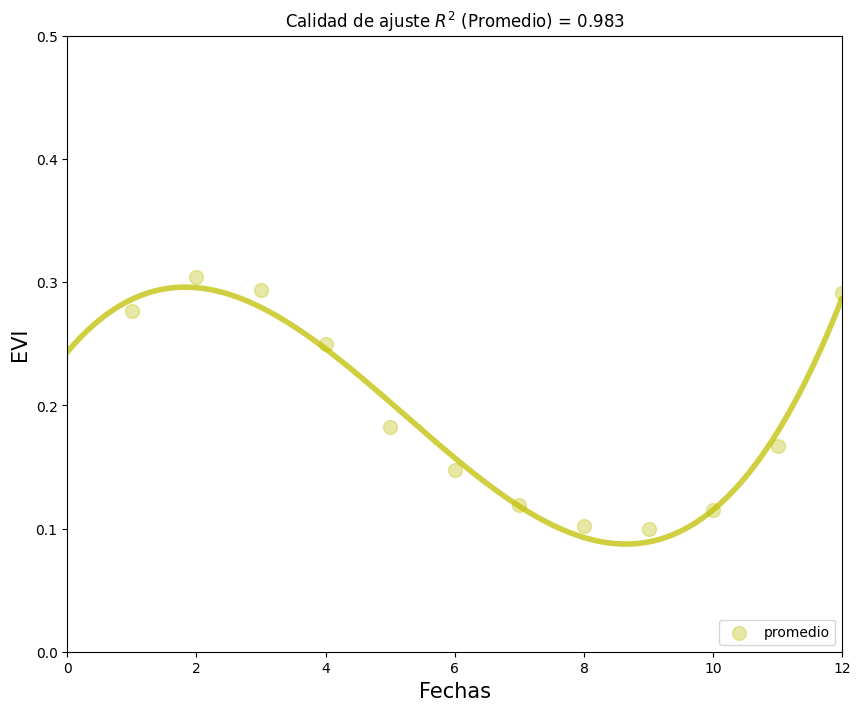

In [91]:
## Grafico

fig, ax = plt.subplots(1, 1, figsize = (10, 8))

# Puntos de entrenamiento
ax.scatter(X_mean, y_mean, color = 'y', alpha = 0.35, s = 100)
# Relacion estimada
x_aux = np.arange(0, 12, 0.01)

y_estimado_mean = np.polyval(np.flip(reg_mean.coef_), x_aux)
ax.plot(x_aux, y_estimado_mean, color = 'y', linestyle = '-', linewidth = 4, alpha = 0.75)
# Calidad del ajuste promedio

ax.set_title('Calidad de ajuste $R^2$ (Promedio) = {:.3f}'.format(reg_mean.score(X_poly_mean, y_mean)))


ax.set_ylim([0, 0.5])
ax.set_xlim([0, 12])

#meses=['Ene','Feb','Mar','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']
#ax.xaxis.set_major_formatter(meses)

plt.ylabel(r'EVI', fontsize=15, color='black')
plt.xlabel(r'Fechas', fontsize=15, color='black')

ax.legend(['promedio'], loc = 4)
plt.show()